In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import scipy.signal
import re
import seaborn as sns
from scipy.interpolate import interp1d
from matplotlib.pyplot import cm
import copy
import sklearn.metrics as sm

def touch(fname):
    if os.path.exists(fname):
        os.utime(fname, None)
    else:
        os.mkdir(fname)

In [122]:
import sklearn

In [3]:
from lmfit import Model 
import lmfit

In [4]:
import lifefit as lf

In [5]:
import matplotlib.gridspec as gridspec

In [6]:
! pip install matplotlib-label-lines

In [7]:
from labellines import labelLines

In [8]:
def half_max(Y):
    return max(Y) / 2.
    
def find_nearest(array, value):
    
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#FWHM(df2.iloc[0]['spec'][0,:],df2.iloc[0]['spec'][1,:])
def fwhm_abs(spec,exind,cutoff_l,cutoff_h):
    spec_cut=spec['spec'][cutoff_l:cutoff_h,:]
    print(spec['file_name'])
    exind+=1
    max_ind=np.where(spec_cut[:,1]==np.amax(spec_cut[:,1]))[0][0]
    nearl=find_nearest(spec_cut[:max_ind,1],half_max(spec_cut[:,1]))
    nearr=find_nearest(spec_cut[max_ind:,1],half_max(spec_cut[:,1]))
    indl=np.where(spec_cut[:,1]==nearl)
    indr=np.where(spec_cut[:,1]==nearr)
    
    return indr[0][-1]-indl[0][0]

In [9]:
def ex(wl):
    ind=wl-385
    return int(ind)

def em(wl):
    ind=wl-400
    return int(ind)

def half_max(Y):
    return max(Y) / 2.
    
def find_nearest(array, value):
    
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#FWHM(df2.iloc[0]['spec'][0,:],df2.iloc[0]['spec'][1,:])
def fwhm(spec):
    print(spec['file_name'])
    #exind+=1
    max_ind=np.where(spec['spec'][:,1]==np.amax(spec['spec'][:,1]))[0][0]
    nearl=find_nearest(spec['spec'][:max_ind,1],half_max(spec['spec'][:,1]))
    nearr=find_nearest(spec['spec'][max_ind:,1],half_max(spec['spec'][:,1]))
    indl=np.where(spec['spec'][:,1]==nearl)
    indr=np.where(spec['spec'][:,1]==nearr)
    
    return indr[0][-1]-indl[0][0]



In [10]:
def monoExp(x, m, t, b):
    return m * np.exp(-x/t) + b

def biExp(x, m1, t1, m2, t2, b):
    return m1 * np.exp(-x/t1) + m2 * np.exp(-x/t2) + b

In [11]:
def monoexp_dec_df(value,x):
  print(x.name)
  argmax=np.argmax(value[:,1])
  for n in range(1,4):
    if value[-n,1] >0.9*argmax:
      value[-n,1]=value[-(n+1),1]
  xv=np.asarray((value[argmax:,0]-value[argmax-1,0]))
  yv=np.asarray(value[argmax:,1]/1000)
  p0=(1.05,7,0.3)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv,p0,maxfev=100000)
  m, t, b = params
  print(t)
  return t

In [12]:
def monoexp_dec(spec,p,skip):
  argmax=skip+np.argmax(spec[:,1])
  #for n in range(1,4):
  #  if spec[-n,1] >0.9*argmax:
  #    spec[-n,1]=spec[-(n+1),1]
  #xv=np.asarray(spec[argmax:,0])
  xv=np.asarray((spec[argmax:,0]-spec[argmax-1,0]))
  yv=np.asarray(spec[argmax:,1])
  p0=(1.05,7,0.3)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv,p,maxfev=500000)
  m, t, b = params
  print(m,t,b)
  return m,t,b

def biexp_dec(spec,p,skip):
  argmax=skip+np.argmax(spec[:,1])
  for n in range(1,4):
    if spec[-n,1] >0.9*argmax:
      spec[-n,1]=spec[-(n+1),1]
  xv=np.asarray((spec[argmax:,0]-spec[argmax-1,0]))
  yv=np.asarray(spec[argmax:,1])
  p0=(1.05,7,0.3)
  params, cv = scipy.optimize.curve_fit(biExp, xv, yv,p,maxfev=800000)
  m1, t1, m2, t2, b = params
  print(m1,t1,m2,t2,b)
  return m1,t1,m2,t2,b

In [13]:
filesPL=glob.glob("*.txt")
filesdictPL=dict.fromkeys(filesPL,1)

In [14]:
def import_raw(filesdict):
    for key in filesdict:
        print(key)
        if "LT" in key:
            tempdata=pd.read_csv(key,skiprows=9,header=None,sep=',')
            datarr=np.squeeze(np.array(tempdata))
            datarr=datarr[:,:-1]
            dataint=datarr.astype(float)
            filesdict[key]=dataint   
            dataint[:,1]*= (100000.0/dataint[:,1].max())
            filesdict[key]=dataint 
        else:
            tempdata=pd.read_csv(key,skiprows=21,header=None,sep=',')
            datarr=np.squeeze(np.array(tempdata))
            datarr=datarr[:,:-1]
            dataint=datarr.astype(float)
            filesdict[key]=dataint       
    return copy.deepcopy(filesdict)

In [15]:
folder='/Users/aaron/Documents/Uni/PhD/My_research/Data/Edinburgh/20230224/'
os.chdir(folder)
touch(folder+'/png')
filesPL=glob.glob("*.txt")
filesdictPL=dict.fromkeys(filesPL,1)

datadict=import_raw(filesdictPL)

pPD_10ul_25C_EM375.txt
mPD_LT450_EM460_IRF.txt
pPD_10ul_60C_LT375_EM590.txt
oPD_10ul_55C_EM450.txt
pPD_10ul_55C_LT375_EM590.txt
pPD_10ul_30C_LT375_EM590.txt
mPD_25ul_40C_EM450.txt
mPD_25ul_15C_EM450.txt
mPD_25ul_55C_LT450.txt
mPD_25ul_62C_LT450.txt
oPD_10ul_40C_LT450.txt
oPD_10ul_15C_LT450.txt
mPD_25ul_45C_EM450.txt
pPD_10ul_15C_LT375_EM590.txt
pPD_10ul_62.5C_LT375_EM590.txt
mPD_25ul_10C_EM450.txt
oPD_10ul_50C_EM450.txt
oPD_LT450_EM460_IRF.txt
oPD_10ul_45C_LT450.txt
oPD_10ul_10C_LT450.txt
mPD_25ul_50C_LT450.txt
pPD_10ul_45C_LT375_EM590.txt
pPD_10ul_20C_LT375_EM590.txt
pPD_10ul_20C_EM375.txt
pPD_10ul_25C_LT375_EM590.txt
mPD_25ul_10C_ex_dep.txt
pPD_10ul_40C_LT375_EM590.txt
pPD_10ul_10C_EM375.txt
pPD_10ul_45C_EM375.txt
mPD_25ul_60C_LT450.txt
oPD_10ul_62.5C_LT450.txt
mPD_25ul_35C_LT450.txt
pPD_10ul_10C_EM375_2.txt
pPD_10ul_10C_LT375_EM590.txt
oPD_10ul_20C_LT450.txt
oPD_10ul_60C_EM450.txt
oPD_10ul_35C_EM450.txt
mPD_25ul_20C_EM450.txt
pPD_10ul_35C_LT375_EM590.txt
oPD_10ul_25C_LT450.txt
mPD_2

In [16]:
checker3='(.*)_(.*)ul_(.*)C_(.*).txt'
df2=pd.DataFrame(index=None,columns=('CD','amount','temperature','measurement','file_name','spec'))
for key in datadict: 
  if re.search(checker3,key) is not None: 
    CD=np.str(re.search(checker3,key).group(1))
    amount=np.int(re.search(checker3,key).group(2))
    temperature=np.float(re.search(checker3,key).group(3))
    mes=re.search(checker3,key).group(4)
    if 'LT' in mes:
      mes='LT'
    else:
      mes='EM'
    #print(typ)
    dat=pd.DataFrame([[CD,amount,temperature,mes,key,filesdictPL[key]]]) 
    dat.columns=df2.columns 
    df2=df2.append(dat,ignore_index=True) 

In [123]:
df2['max']=df2.apply(lambda x: np.nanmax(x['spec'][1:,:]) if 'EM' in x.measurement else np.nan, axis=1)

In [18]:
df2['max_em']=df2.apply(lambda x: np.amin(x['spec'][:,0])+(np.where(x['spec'][:,1]==np.amax(x['spec'][:,1]))[0][0]) if 'EM' in x.measurement else np.nan, axis=1)

In [19]:
df2['FWHM']=df2.apply(lambda x: fwhm(x) if 'EM' in x.measurement else np.nan, axis=1)

pPD_10ul_25C_EM375.txt
oPD_10ul_55C_EM450.txt
mPD_25ul_40C_EM450.txt
mPD_25ul_15C_EM450.txt
mPD_25ul_45C_EM450.txt
mPD_25ul_10C_EM450.txt
oPD_10ul_50C_EM450.txt
pPD_10ul_20C_EM375.txt
mPD_25ul_10C_ex_dep.txt
pPD_10ul_10C_EM375.txt
pPD_10ul_45C_EM375.txt
pPD_10ul_10C_EM375_2.txt
oPD_10ul_60C_EM450.txt
oPD_10ul_35C_EM450.txt
mPD_25ul_20C_EM450.txt
mPD_25ul_25C_EM450.txt
oPD_10ul_30C_EM450.txt
pPD_10ul_15C_EM375.txt
pPD_10ul_40C_EM375.txt
pPD_10ul_30C_EM375.txt
pPD_10ul_62.5C_EM375.txt
mPD_25ul_62C_EM450.txt
mPD_25ul_55C_EM450.txt
oPD_10ul_15C_EM450.txt
oPD_10ul_40C_EM450.txt
oPD_10ul_10C_EM450.txt
oPD_10ul_45C_EM450.txt
mPD_25ul_50C_EM450.txt
pPD_10ul_60C_EM375.txt
pPD_10ul_35C_EM375.txt
pPD_10ul_50C_EM375.txt
mPD_25ul_35C_EM450.txt
mPD_25ul_60C_EM450.txt
oPD_10ul_62.5C_EM450.txt
oPD_10ul_20C_EM450.txt
oPD_10ul_25C_EM450.txt
mPD_25ul_30C_EM450.txt
pPD_10ul_55C_EM375.txt


In [20]:
pLT=df2.query('CD.str.contains("pPD").values & measurement.str.contains("LT").values').copy(deep=True)

In [21]:
pPL=df2.query('CD.str.contains("pPD").values & measurement.str.contains("EM").values').copy(deep=True)

In [22]:
def biexp_plot(spec2,p,name,skip,path):
  spec=spec2.copy()
  #spec[:,1]=spec[:,1]-np.average(spec[-5:,1])
  #spec[:,1] = np.where(spec[:,1] < 0.1, 0.1, spec[:,1])   
  spec[:,1]=spec[:,1]/10000
  
  argmax=np.argmax(spec[:,1])
  m1,t1,m2,t2,b=biexp_dec(spec,p,skip)
  plt.close()
  plt.figure(figsize=(6,5))
  plt.plot(spec[:,0],spec[:,1]) 
  plt.plot(spec[argmax+skip:,0], biExp(spec[:-argmax-skip,0], m1, t1, m2,t2,b), '--', label="fitted",linewidth=3.0) 
  plt.xlim(0,100)
  plt.yscale('log')
  print(m1,t1,m2,t2,b)
  plt.xlabel('Time (ns)')
  plt.ylabel("Photons")
  plt.tight_layout()
  plt.savefig("png/"+str(path)+str(name)+"_C.png",dpi=300,facecolor='white')
  return [np.round(100*m1/(m1+m2),decimals=1),np.round(t1,decimals=3),np.round(100*m2/(m1+m2),decimals=1),np.round(t2,decimals=3)]

In [23]:
def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2)))

def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2)))

In [24]:
def _2gauss_plot(spec2,p,name,savename,start,end):
  spec=spec2.copy()
  x_array=np.asarray(spec[:,0])
  y_array=np.asarray(spec[:,1])
  popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, x_array, y_array, p,maxfev=100000)
  perr_2gauss = np.sqrt(np.diag(pcov_2gauss))
  pars_1 = popt_2gauss[0:3]
  pars_2 = popt_2gauss[3:6]
  gauss_peak_1 = _1gaussian(x_array, *pars_1)
  gauss_peak_2 = _1gaussian(x_array, *pars_2)
  plt.close()
  fig = plt.figure(figsize=(6,4))
  ax1 = fig.add_subplot()

  ax1.plot(x_array, y_array, "black")
  ax1.plot(x_array, _2gaussian(x_array, *popt_2gauss), 'red')#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

  # peak 1
  ax1.plot(x_array, gauss_peak_1, "g")
  ax1.fill_between(x_array, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)
  
  # peak 2
  ax1.plot(x_array, gauss_peak_2, "y")
  ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5)  
  ax1.set_xlabel('Wavelength (nm)')
  ax1.set_ylabel('Intensity (a.u.)')
  ax1.set_xlim(start,end)
  ax1.set_ylim(0,1.2*max(y_array))
  fig.tight_layout()
  fig.savefig(savename+str(name)+"_C.png",dpi=300,facecolor='white')
  ret=np.append(pars_1,pars_2)
  return ret

In [25]:
def exp(x,A,B,C):
    return A*np.exp(B*x)+C

def ln(x,A,B,C,D):
    return A*np.log(B*x+C)+D

In [26]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams.update({'font.size': 14,'font.weight':'normal'})

In [27]:
pLT_aug=pd.DataFrame(columns=['CD','amount','type','temp1','temp2','temperature','measurement','spec'])
for i in pLT.temperature.values:
    print(i)
    for diff in [5,10]:
        print(diff)
        if len(pLT.loc[pLT['temperature'] == i+diff])>0:
            dat1=pLT.loc[pLT['temperature'] == i+diff]
            dat2=pLT.loc[pLT['temperature'] == i]
            CD=dat1.CD.values[0]
            amount=dat1.amount.values[0]
            measurement=dat1.measurement.values[0]
            spec1=spec=copy.deepcopy(dat1.spec.values[0])
            spec2=spec=copy.deepcopy(dat2.spec.values[0])
            temp1=dat1.temperature.values[0]
            temp2=dat2.temperature.values[0]
            type='aug'
            for int in np.arange(1,abs(diff)):
                spec=spec1+(int/diff)*(spec2-spec1)
                maxv=max(spec[:,1])
                noisel=min(50,min(spec[:,1]))
                spec[:,1]=spec[:,1]+np.random.uniform(-0.5*noisel,0.5*noisel,len(spec[:,1]))
                for l in range(len(spec[:,1])):
                    spec[l,1]=spec[l,1]+np.random.uniform(-0.01*spec[l,1],0.01*spec[l,1])
                spec[:,1]=spec[:,1]*maxv/max(spec[:,1])
                temp=temp1+(int/diff)*(temp2-temp1)
                print(temp1,temp2,temp)
                dat=pd.DataFrame([[CD,amount,type,temp1,temp2,temp,measurement,spec]])
                dat.columns=pLT_aug.columns 
                pLT_aug=pLT_aug.append(dat,ignore_index=True)  
    #pLT.loc[pLT['temperature'] == i-10]
    #print(i)

60.0
5
10
55.0
5
60.0 55.0 59.0
60.0 55.0 58.0
60.0 55.0 57.0
60.0 55.0 56.0
10
30.0
5
35.0 30.0 34.0
35.0 30.0 33.0
35.0 30.0 32.0
35.0 30.0 31.0
10
40.0 30.0 39.0
40.0 30.0 38.0
40.0 30.0 37.0
40.0 30.0 36.0
40.0 30.0 35.0
40.0 30.0 34.0
40.0 30.0 33.0
40.0 30.0 32.0
40.0 30.0 31.0
15.0
5
20.0 15.0 19.0
20.0 15.0 18.0
20.0 15.0 17.0
20.0 15.0 16.0
10
25.0 15.0 24.0
25.0 15.0 23.0
25.0 15.0 22.0
25.0 15.0 21.0
25.0 15.0 20.0
25.0 15.0 19.0
25.0 15.0 18.0
25.0 15.0 17.0
25.0 15.0 16.0
62.5
5
10
45.0
5
50.0 45.0 49.0
50.0 45.0 48.0
50.0 45.0 47.0
50.0 45.0 46.0
10
55.0 45.0 54.0
55.0 45.0 53.0
55.0 45.0 52.0
55.0 45.0 51.0
55.0 45.0 50.0
55.0 45.0 49.0
55.0 45.0 48.0
55.0 45.0 47.0
55.0 45.0 46.0
20.0
5
25.0 20.0 24.0
25.0 20.0 23.0
25.0 20.0 22.0
25.0 20.0 21.0
10
30.0 20.0 29.0
30.0 20.0 28.0
30.0 20.0 27.0
30.0 20.0 26.0
30.0 20.0 25.0
30.0 20.0 24.0
30.0 20.0 23.0
30.0 20.0 22.0
30.0 20.0 21.0
25.0
5
30.0 25.0 29.0
30.0 25.0 28.0
30.0 25.0 27.0
30.0 25.0 26.0
10
35.0 25.0 34.0
35.0 

10.602389941362935 0.9958473629553697 1.4505660505290514 6.960697171552846 0.008538283495815212
10.602389941362935 0.9958473629553697 1.4505660505290514 6.960697171552846 0.008538283495815212
10.678696945093048 1.0160032127564216 1.3579402062660775 7.081527691859149 0.008287739237221455
10.678696945093048 1.0160032127564216 1.3579402062660775 7.081527691859149 0.008287739237221455
10.724294306549815 1.0632269855664565 1.1690417843929437 7.799067010878824 0.008489686038359265
10.724294306549815 1.0632269855664565 1.1690417843929437 7.799067010878824 0.008489686038359265
10.501423624519978 1.1131516706697278 1.2357647628753494 8.319316792108078 0.008818082068997528
10.501423624519978 1.1131516706697278 1.2357647628753494 8.319316792108078 0.008818082068997528
10.473008039779943 1.028050745255359 1.513781521520757 7.036102966843277 0.008561562541482938
10.473008039779943 1.028050745255359 1.513781521520757 7.036102966843277 0.008561562541482938
10.73374198200848 1.0465940276653627 1.18917

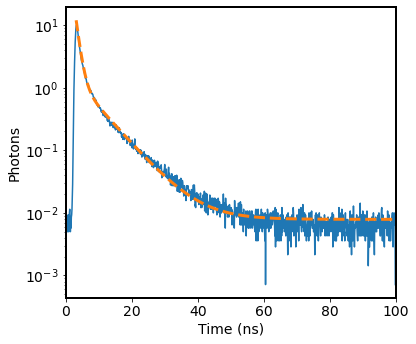

In [28]:
pLT['lifetimes']=pLT.apply(lambda x: biexp_plot(x['spec'],(10,1,2,7,0.2),x['temperature'],-1,"obs_LT_fit_pPD_2"), axis=1)

In [29]:
pLT=pLT.sort_values(by='temperature',ascending=True)
pLT.reset_index(inplace=True)

In [30]:
def norm(spec2,dfname):
    spec=copy.deepcopy(spec2)
    spec[:,1]=(spec[:,1]-min(spec[:,1]))
    spec[:,1]=spec[:,1]/max(dfname['max'])*1000
    return spec

def locnorm(spec2):
    spec=copy.deepcopy(spec2)
    spec[:,1]=(spec[:,1]-min(spec[:,1]))
    spec[:,1]=spec[:,1]/max(spec[:,1])*1000
    return spec

In [31]:
#pPL['max']=pPL.apply(lambda x: max(x['spec'][:,1]), axis=1)
pPL['spec_norm']=pPL['spec'].copy(deep=True)
pPL['spec_norm']=pPL.apply(lambda x: norm(x['spec_norm'],pPL), axis=1)

In [32]:
pPL['max480']=pPL.apply(lambda x: x['spec'][50,1], axis=1)

In [33]:
pPL=pPL.drop(index=48)

In [34]:
pPL=pPL.drop(index=25)

In [35]:
pPL=pPL.sort_values(by=['temperature'])

In [36]:
pPL

,CD,amount,temperature,measurement,file_name,spec,max,max_em,FWHM,spec_norm,max480
30,pPD,10,10.0,EM,pPD_10ul_10C_EM375_2.txt,"[[430.0, 1805.0], [431.0, 1731.0], [432.0, 179...",4768.0,591.0,180.0,"[[430.0, 156.6794942275976], [431.0, 148.54315...",3410.0
42,pPD,10,15.0,EM,pPD_10ul_15C_EM375.txt,"[[430.0, 1799.0], [431.0, 1767.0], [432.0, 169...",4823.0,590.0,177.0,"[[430.0, 156.23969213853766], [431.0, 152.7212...",3229.0
21,pPD,10,20.0,EM,pPD_10ul_20C_EM375.txt,"[[430.0, 1622.0], [431.0, 1616.0], [432.0, 156...",4817.0,586.0,176.0,"[[430.0, 136.44859813084113], [431.0, 135.7888...",3057.0
0,pPD,10,25.0,EM,pPD_10ul_25C_EM375.txt,"[[430.0, 1551.0], [431.0, 1572.0], [432.0, 153...",5016.0,588.0,116.0,"[[430.0, 128.0923584387026], [431.0, 130.40131...",2857.0
44,pPD,10,30.0,EM,pPD_10ul_30C_EM375.txt,"[[430.0, 1598.0], [431.0, 1515.0], [432.0, 149...",5179.0,596.0,99.0,"[[430.0, 130.73117097306212], [431.0, 121.6052...",2840.0
60,pPD,10,35.0,EM,pPD_10ul_35C_EM375.txt,"[[430.0, 1560.0], [431.0, 1486.0], [432.0, 146...",5347.0,594.0,129.0,"[[430.0, 126.66300164925784], [431.0, 118.5266...",2777.0
43,pPD,10,40.0,EM,pPD_10ul_40C_EM375.txt,"[[430.0, 1489.0], [431.0, 1408.0], [432.0, 145...",5639.0,590.0,144.0,"[[430.0, 121.93512919186367], [431.0, 113.0291...",2610.0
26,pPD,10,45.0,EM,pPD_10ul_45C_EM375.txt,"[[430.0, 1408.0], [431.0, 1513.0], [432.0, 130...",6130.0,592.0,96.0,"[[430.0, 101.92413413963716], [431.0, 113.4689...",2623.0
61,pPD,10,50.0,EM,pPD_10ul_50C_EM375.txt,"[[430.0, 1513.0], [431.0, 1428.0], [432.0, 141...",6515.0,592.0,92.0,"[[430.0, 113.57888949972512], [431.0, 104.2330...",2644.0
73,pPD,10,55.0,EM,pPD_10ul_55C_EM375.txt,"[[430.0, 1528.0], [431.0, 1377.0], [432.0, 134...",6978.0,591.0,92.0,"[[430.0, 116.43760307861463], [431.0, 99.83507...",2683.0


In [37]:
pPL['max']=pPL.apply(lambda x: np.nanmax(x['spec'][1:,:]), axis=1)

In [38]:
pPL['spec_norm']=pPL['spec'].copy(deep=True)
pPL['spec_norm']=pPL.apply(lambda x: norm(x['spec_norm'],pPL), axis=1)

In [39]:
pPL['spec_locnorm']=pPL['spec'].copy(deep=True)
pPL['spec_locnorm']=pPL.apply(lambda x: locnorm(x['spec_locnorm']), axis=1)

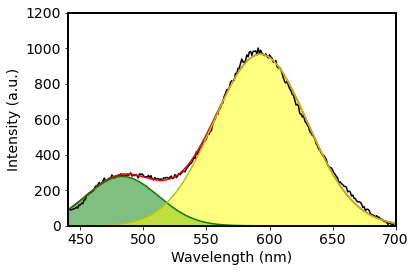

In [40]:
pPL['2fit_locnorm']=pPL.apply(lambda x: _2gauss_plot(x['spec_locnorm'],[5000, 450, 1, 5000, 600, 1],x['temperature'],"png/loc_norm_gauss_2_pPL_1_",440,700), axis=1)

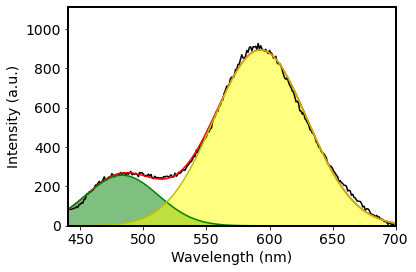

In [41]:
pPL['2fit_norm']=pPL.apply(lambda x: _2gauss_plot(x['spec_norm'],[5000, 450, 1, 5000, 600, 1],x['temperature'],"png/obs_gauss_2_pPL_1_",440,700), axis=1)

In [42]:
pPL_aug=pd.DataFrame(columns=['CD','amount','type','temp1','temp2','temperature','measurement','spec'])
for i in pPL.temperature.values:
    print(i)
    for diff in [5,10]:
        print(diff)
        if len(pPL.loc[pPL['temperature'] == i+diff])>0:
            dat1=pPL.loc[pPL['temperature'] == i+diff]
            dat2=pPL.loc[pPL['temperature'] == i]
            CD=dat1.CD.values[0]
            amount=dat1.amount.values[0]
            measurement=dat1.measurement.values[0]
            spec1=spec=copy.deepcopy(dat1.spec.values[0])
            spec2=spec=copy.deepcopy(dat2.spec.values[0])
            temp1=dat1.temperature.values[0]
            temp2=dat2.temperature.values[0]
            type='aug'
            for int in np.arange(1,abs(diff)):
                spec=spec1+(int/diff)*(spec2-spec1)
                noisel=min(50,min(spec[:,1]))
                spec[:,1]=spec[:,1]+np.random.uniform(-0.5*noisel,0.5*noisel,len(spec[:,1]))
                for l in range(len(spec[:,1])):
                    spec[l,1]=spec[l,1]+np.random.uniform(-0.02*spec[l,1],0.02*spec[l,1])
                temp=temp1+(int/diff)*(temp2-temp1)
                print(temp1,temp2,temp)
                dat=pd.DataFrame([[CD,amount,type,temp1,temp2,temp,measurement,spec]])
                dat.columns=pPL_aug.columns 
                pPL_aug=pPL_aug.append(dat,ignore_index=True)  

10.0
5
15.0 10.0 14.0
15.0 10.0 13.0
15.0 10.0 12.0
15.0 10.0 11.0
10
20.0 10.0 19.0
20.0 10.0 18.0
20.0 10.0 17.0
20.0 10.0 16.0
20.0 10.0 15.0
20.0 10.0 14.0
20.0 10.0 13.0
20.0 10.0 12.0
20.0 10.0 11.0
15.0
5
20.0 15.0 19.0
20.0 15.0 18.0
20.0 15.0 17.0
20.0 15.0 16.0
10
25.0 15.0 24.0
25.0 15.0 23.0
25.0 15.0 22.0
25.0 15.0 21.0
25.0 15.0 20.0
25.0 15.0 19.0
25.0 15.0 18.0
25.0 15.0 17.0
25.0 15.0 16.0
20.0
5
25.0 20.0 24.0
25.0 20.0 23.0
25.0 20.0 22.0
25.0 20.0 21.0
10
30.0 20.0 29.0
30.0 20.0 28.0
30.0 20.0 27.0
30.0 20.0 26.0
30.0 20.0 25.0
30.0 20.0 24.0
30.0 20.0 23.0
30.0 20.0 22.0
30.0 20.0 21.0
25.0
5
30.0 25.0 29.0
30.0 25.0 28.0
30.0 25.0 27.0
30.0 25.0 26.0
10
35.0 25.0 34.0
35.0 25.0 33.0
35.0 25.0 32.0
35.0 25.0 31.0
35.0 25.0 30.0
35.0 25.0 29.0
35.0 25.0 28.0
35.0 25.0 27.0
35.0 25.0 26.0
30.0
5
35.0 30.0 34.0
35.0 30.0 33.0
35.0 30.0 32.0
35.0 30.0 31.0
10
40.0 30.0 39.0
40.0 30.0 38.0
40.0 30.0 37.0
40.0 30.0 36.0
40.0 30.0 35.0
40.0 30.0 34.0
40.0 30.0 33.0
40.0 

In [43]:
pPL_aug['max']=pPL_aug.apply(lambda x: np.nanmax(x['spec'][1:,:]), axis=1)

In [44]:
pPL_aug

,CD,amount,type,temp1,temp2,temperature,measurement,spec,max
0,pPD,10,aug,15.0,10.0,14.0,EM,"[[430.0, 1743.762908361446], [431.0, 1744.4302...",4812.819980
1,pPD,10,aug,15.0,10.0,13.0,EM,"[[430.0, 1780.6201876230773], [431.0, 1717.809...",4783.846514
2,pPD,10,aug,15.0,10.0,12.0,EM,"[[430.0, 1807.8800210035931], [431.0, 1793.858...",4796.532762
3,pPD,10,aug,15.0,10.0,11.0,EM,"[[430.0, 1780.4498858532495], [431.0, 1722.959...",4843.585979
4,pPD,10,aug,20.0,10.0,19.0,EM,"[[430.0, 1661.562040792096], [431.0, 1645.2553...",4808.236551
...,...,...,...,...,...,...,...,...,...
116,pPD,10,aug,60.0,50.0,51.0,EM,"[[430.0, 1501.2774816583199], [431.0, 1394.208...",6762.172290
117,pPD,10,aug,60.0,55.0,59.0,EM,"[[430.0, 1542.7043725840545], [431.0, 1461.894...",7797.859788
118,pPD,10,aug,60.0,55.0,58.0,EM,"[[430.0, 1525.9122601236006], [431.0, 1473.496...",7556.279311
119,pPD,10,aug,60.0,55.0,57.0,EM,"[[430.0, 1545.272958108512], [431.0, 1405.8831...",7323.813411


In [45]:
pPL_aug['spec_norm']=pPL_aug['spec'].copy(deep=True)
pPL_aug['spec_norm']=pPL_aug.apply(lambda x: norm(x['spec_norm'],pPL), axis=1)
pPL_aug['spec_locnorm']=pPL_aug['spec'].copy(deep=True)
pPL_aug['spec_locnorm']=pPL_aug.apply(lambda x: locnorm(x['spec_locnorm']), axis=1)

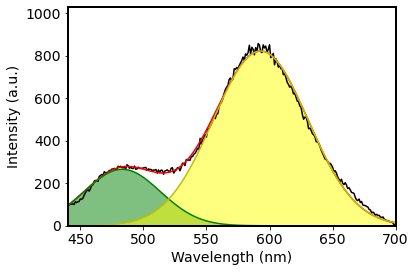

In [46]:
pPL_aug['2fit_norm']=pPL_aug.apply(lambda x: _2gauss_plot(x['spec_norm'],[5000, 450, 1, 5000, 600, 1],x['temperature'],"png/aug_gauss_2_pPL_1_",440,700), axis=1)

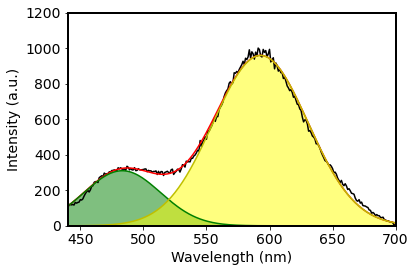

In [47]:
pPL_aug['2fit_locnorm']=pPL_aug.apply(lambda x: _2gauss_plot(x['spec_locnorm'],[5000, 450, 1, 5000, 600, 1],x['temperature'],"png/aug_locnorm?gauss_2_pPL_1_",440,700), axis=1)

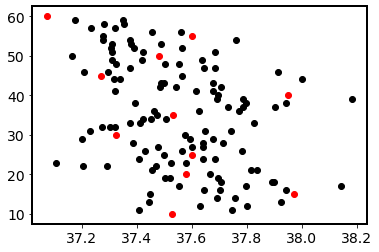

In [48]:
plt.scatter([i[5] for i in pPL_aug['2fit_norm']],pPL_aug['temperature'],color='black')
plt.scatter([i[5] for i in pPL['2fit_norm']],pPL['temperature'],color='red')
#plt.plot(y_array,ln(y_array,*popt_ln))

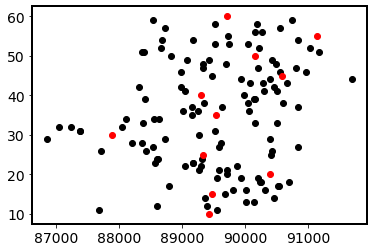

In [49]:
plt.scatter([i[3] for i in pPL_aug['2fit_locnorm']],pPL_aug['temperature'],color='black')
plt.scatter([i[3] for i in pPL['2fit_locnorm']],pPL['temperature'],color='red')
#plt.plot(y_array,ln(y_array,*popt_ln))

In [50]:
pmerge=pd.merge(pPL_aug, pLT_aug, how="left", on=["CD","amount","type","temp1", "temp2","temperature",])
pobsmerge=pd.merge(pPL, pLT, how="left", on=["CD","amount","temperature",])

10.711957869224912 1.2443192781725154 1.040661022751143 9.503904527665135 0.006626575549859073
10.711957869224912 1.2443192781725154 1.040661022751143 9.503904527665135 0.006626575549859073
10.672975843358174 1.2418697449719278 1.050443026806117 9.499561227157908 0.007195259396821019
10.672975843358174 1.2418697449719278 1.050443026806117 9.499561227157908 0.007195259396821019
10.610337431606105 1.2387286021430084 1.0683768991982343 9.441693156400024 0.00793882043522948
10.610337431606105 1.2387286021430084 1.0683768991982343 9.441693156400024 0.00793882043522948
10.597320981199193 1.237365396871276 1.0853307673555657 9.43123694537838 0.00858156648034028
10.597320981199193 1.237365396871276 1.0853307673555657 9.43123694537838 0.00858156648034028
10.632298129403994 1.1131683792070683 1.1707934878263244 8.358727524507628 0.008364099104472063
10.632298129403994 1.1131683792070683 1.1707934878263244 8.358727524507628 0.008364099104472063
10.65135962693917 1.1163317634292105 1.1945490228876

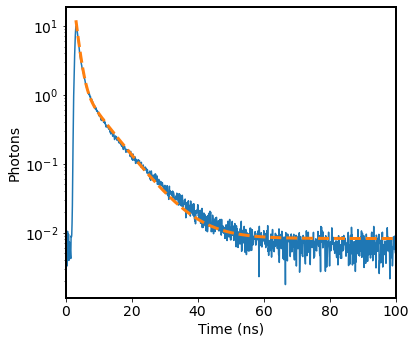

In [51]:
pmerge['lifetimes']=pmerge.apply(lambda x: biexp_plot(x['spec_y'],(10,1,2,7,0.2),x['temperature'],-1,"aug_LT_fit_pPD"), axis=1)

Text(0.0, 1.0, 'b)')

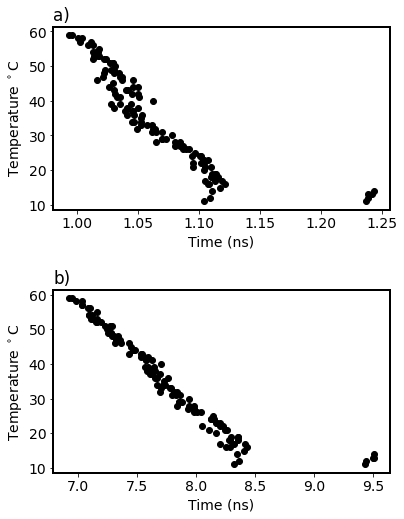

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False,
                               gridspec_kw={'height_ratios': [1,1]},
                               figsize=(6, 8))
fig.set_tight_layout({'rect': [0, 0, 1, 0.95], 'pad': 1.5, 'h_pad': 1.5})
#plt.setp(axes, title='Test')
#fig.suptitle('An overall title', size=20)

#popt_lin, pcov_lin = scipy.optimize.curve_fit(lin, [item[3] for item in pLT.lifetimes.values][1:], pLT.temperature.values[1:], (-5,10),maxfev=100000)

axes[1].scatter([item[3] for item in pmerge.lifetimes.values],pmerge.temperature.values,color='black')
#axes[1].plot(x_one_lt[1:], lin(x_one_lt[1:], *popt_lin), color='blue')#,\

#popt_lin, pcov_lin = scipy.optimize.curve_fit(lin, [item[1] for item in pLT.lifetimes.values][1:], pLT.temperature.values[1:], (-5,10),maxfev=100000)

axes[0].scatter([item[1] for item in pmerge.lifetimes.values],pmerge.temperature.values,color='black')
#axes[0].plot(x_two_lt[1:], lin(x_two_lt[1:], *popt_lin), color='blue')#,\



#axes[1].set_xlim(4500,9500)
#axes[1].set_ylim(5,65)
#axes[0].set_xlim(5,65)
#axes[0].set_ylim(4500,9500)

axes[0].set_xlabel('Time (ns)')
axes[1].set_xlabel('Time (ns)')
#axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[0].set_ylabel('Temperature $^\circ$C')
axes[1].set_ylabel('Temperature $^\circ$C')
axes[0].set_title('a)',loc='left')
axes[1].set_title('b)',loc='left')

In [53]:
pmerge

,CD,amount,type,temp1,temp2,temperature,measurement_x,spec_x,max,spec_norm,spec_locnorm,2fit_norm,2fit_locnorm,measurement_y,spec_y,lifetimes
0,pPD,10,aug,15.0,10.0,14.0,EM,"[[430.0, 1743.762908361446], [431.0, 1744.4302...",4812.819980,"[[430.0, 173.6927484140182], [431.0, 173.77798...","[[430.0, 307.0381504760323], [431.0, 307.18882...","[31237.84194621255, 486.06862628312365, 33.495...","[55219.374489488735, 486.06859600364004, 33.49...",LT,"[[0.0, 76.67511326921186], [0.09765625, 131.60...","[91.1, 1.244, 8.9, 9.504]"
1,pPD,10,aug,15.0,10.0,13.0,EM,"[[430.0, 1780.6201876230773], [431.0, 1717.809...",4783.846514,"[[430.0, 179.41227691720255], [431.0, 171.3894...","[[430.0, 318.6633610135263], [431.0, 304.41364...","[31556.431885332106, 485.89222404519876, 33.52...","[56048.959200282545, 485.8921874436246, 33.529...",LT,"[[0.0, 68.28597010883634], [0.09765625, 146.42...","[91.0, 1.242, 9.0, 9.5]"
2,pPD,10,aug,15.0,10.0,12.0,EM,"[[430.0, 1807.8800210035931], [431.0, 1793.858...",4796.532762,"[[430.0, 182.61105533126417], [431.0, 180.8200...","[[430.0, 323.57630715279856], [431.0, 320.4028...","[32284.335356116208, 486.3182299360407, 33.697...","[57205.97461286813, 486.3181773637889, 33.6978...",LT,"[[0.0, 100.02778713660467], [0.09765625, 102.2...","[90.9, 1.239, 9.1, 9.442]"
3,pPD,10,aug,15.0,10.0,11.0,EM,"[[430.0, 1780.4498858532495], [431.0, 1722.959...",4843.585979,"[[430.0, 176.858227946888], [431.0, 169.514942...","[[430.0, 311.3080130571836], [431.0, 298.38227...","[32591.708435819495, 486.6933657451805, 33.730...","[57368.31689639437, 486.69334216196546, 33.730...",LT,"[[0.0, 87.44145416072043], [0.09765625, 110.35...","[90.7, 1.237, 9.3, 9.431]"
4,pPD,10,aug,20.0,10.0,19.0,EM,"[[430.0, 1661.562040792096], [431.0, 1645.2553...",4808.236551,"[[430.0, 161.48264089783063], [431.0, 159.3997...","[[430.0, 286.61752922824945], [431.0, 282.9206...","[28584.393283378835, 486.1086330352234, 33.219...","[50734.79271265899, 486.10863470783005, 33.219...",LT,"[[0.0, 35.99361637003238], [0.09765625, 119.54...","[90.1, 1.113, 9.9, 8.359]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,pPD,10,aug,60.0,50.0,51.0,EM,"[[430.0, 1501.2774816583199], [431.0, 1394.208...",6762.172290,"[[430.0, 127.40441298454502], [431.0, 113.7284...","[[430.0, 159.3790875071757], [431.0, 142.27084...","[20229.50781175284, 483.75249581651804, 30.390...","[25306.521952797943, 483.7525181237944, 30.390...",LT,"[[0.0, 64.25251535823412], [0.09765625, 106.97...","[89.5, 1.029, 10.5, 7.29]"
117,pPD,10,aug,60.0,55.0,59.0,EM,"[[430.0, 1542.7043725840545], [431.0, 1461.894...",7797.859788,"[[430.0, 127.15960124151907], [431.0, 116.8377...","[[430.0, 137.30180188293676], [431.0, 126.1566...","[18773.760502675676, 482.8796471893, 28.746877...","[20271.110744713515, 482.87958553236416, 28.74...",LT,"[[0.0, 55.9546013952299], [0.09765625, 109.046...","[88.1, 0.996, 11.9, 6.95]"
118,pPD,10,aug,60.0,55.0,58.0,EM,"[[430.0, 1525.9122601236006], [431.0, 1473.496...",7556.279311,"[[430.0, 128.33250085875912], [431.0, 121.6373...","[[430.0, 142.81498361904934], [431.0, 135.3643...","[19253.77710153933, 483.07249688077815, 29.128...","[21426.631007566528, 483.07252265097964, 29.12...",LT,"[[0.0, 63.15764202658567], [0.09765625, 106.78...","[88.2, 1.001, 11.8, 6.987]"
119,pPD,10,aug,60.0,55.0,57.0,EM,"[[430.0, 1545.272958108512], [431.0, 1405.8831...",7323.813411,"[[430.0, 131.11272500468525], [431.0, 113.3084...","[[430.0, 150.84176474176112], [431.0, 130.3583...","[19392.912993024507, 483.1831723223003, 29.332...","[22311.014753857275, 483.1831353979496, 29.332...",LT,"[[0.0, 51.10314831298427], [0.09765625, 83.856...","[88.4, 1.011, 11.6, 7.037]"


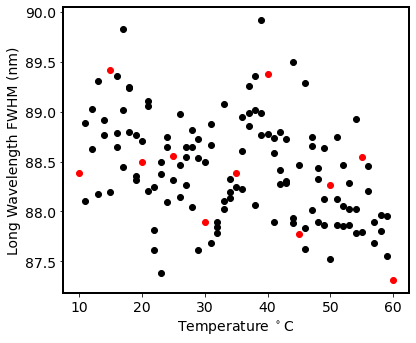

In [54]:
plt.figure(figsize=(6,5))
plt.scatter(pmerge['temperature'],[2.355*i[5] for i in pmerge['2fit_norm']],color='black')
plt.scatter(pPL['temperature'],[2.355*i[5] for i in pPL['2fit_norm']],color='red')
plt.xlabel('Temperature $^\circ$C')
plt.ylabel('Long Wavelength FWHM (nm)')
plt.tight_layout()
plt.savefig("aug_data_FWHM_long.png",facecolor='white',dpi=300)

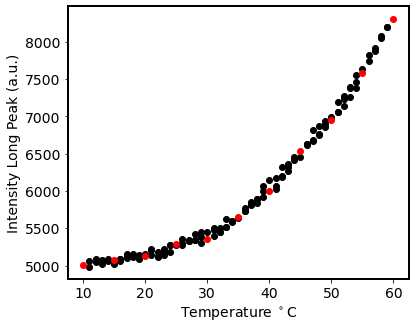

In [71]:
plt.figure(figsize=(6,4.8))
plt.scatter(pmerge['temperature'],[i[3]/10 for i in pmerge['2fit_norm']],color='black')
plt.scatter(pPL['temperature'],[i[3]/10 for i in pPL['2fit_norm']],color='red')
plt.xlabel('Temperature $^\circ$C')
plt.ylabel('Intensity Long Peak (a.u.)')
plt.tight_layout()
plt.savefig("aug_data_peak_long.png",facecolor='white',dpi=300)

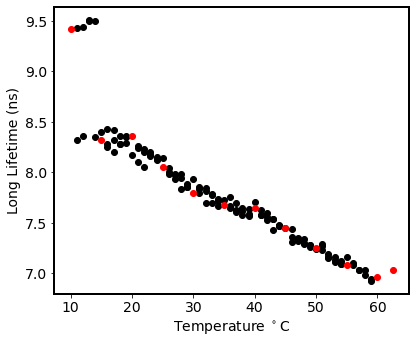

In [56]:
plt.figure(figsize=(6,5))
plt.scatter(pmerge['temperature'],[i[3] for i in pmerge['lifetimes']],color='black')
plt.scatter(pLT['temperature'],[i[3] for i in pLT['lifetimes']],color='red')
plt.xlabel('Temperature $^\circ$C')
plt.ylabel('Long Lifetime (ns)')
plt.tight_layout()
plt.savefig("aug_data_lt_long.png",facecolor='white',dpi=300)

In [76]:
pmerge

,CD,amount,type,temp1,temp2,temperature,measurement_x,spec_x,max,spec_norm,spec_locnorm,2fit_norm,2fit_locnorm,measurement_y,spec_y,lifetimes
73,pPD,10,aug,45.0,35.0,40.0,EM,"[[430.0, 1525.0051611381668], [431.0, 1448.935...",5773.578020,"[[430.0, 140.72618520643766], [431.0, 131.0098...","[[430.0, 205.9214555799139], [431.0, 191.70373...","[22757.739529482493, 484.5837517258577, 31.624...","[33300.91484944996, 484.583782726843, 31.62418...",LT,"[[0.0, 52.63367160004962], [0.09765625, 74.971...","[90.3, 1.062, 9.7, 7.705]"
47,pPD,10,aug,35.0,25.0,30.0,EM,"[[430.0, 1572.503123684628], [431.0, 1482.9590...",5182.409805,"[[430.0, 149.14364241578932], [431.0, 137.7061...","[[430.0, 244.40247085875052], [431.0, 225.6598...","[25025.155546756152, 485.3957868421574, 32.933...","[41008.86500839819, 485.39582157834957, 32.933...",LT,"[[0.0, 71.2577408080176], [0.09765625, 72.1889...","[90.3, 1.078, 9.7, 7.939]"
31,pPD,10,aug,30.0,20.0,28.0,EM,"[[430.0, 1622.5186651124334], [431.0, 1543.877...",5126.012296,"[[430.0, 156.88512451550085], [431.0, 146.8403...","[[430.0, 259.5771856448753], [431.0, 242.95736...","[25580.915584481696, 485.19752018257395, 33.22...","[42325.396765880294, 485.19757196313964, 33.22...",LT,"[[0.0, 51.18531407299577], [0.09765625, 73.031...","[90.1, 1.065, 9.9, 7.838]"
115,pPD,10,aug,60.0,50.0,52.0,EM,"[[430.0, 1500.6069935473731], [431.0, 1433.139...",6773.087752,"[[430.0, 128.76005728503264], [431.0, 120.1424...","[[430.0, 160.50562012149177], [431.0, 149.7633...","[20193.332885222735, 483.45442269099016, 30.33...","[25171.864085791847, 483.45429438232935, 30.33...",LT,"[[0.0, 65.31050081216468], [0.09765625, 99.603...","[89.2, 1.013, 10.8, 7.158]"
5,pPD,10,aug,20.0,10.0,18.0,EM,"[[430.0, 1696.284212262266], [431.0, 1596.4995...",4809.582315,"[[430.0, 170.05838279685844], [431.0, 157.3128...","[[430.0, 299.54586760910365], [431.0, 277.0955...","[29254.73889275295, 485.7747454312423, 33.3537...","[51530.16528483163, 485.7747511107933, 33.3537...",LT,"[[0.0, 65.56922432673937], [0.09765625, 108.32...","[89.9, 1.116, 10.1, 8.359]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,pPD,10,aug,35.0,25.0,28.0,EM,"[[430.0, 1511.6416789588002], [431.0, 1538.612...",5128.390554,"[[430.0, 143.46404305455218], [431.0, 146.9089...","[[430.0, 236.96136043849333], [431.0, 242.6514...","[25484.004360528168, 485.1707862753842, 32.831...","[42092.286230216385, 485.17082153324, 32.83195...",LT,"[[0.0, 72.26599509692981], [0.09765625, 99.257...","[90.3, 1.084, 9.7, 7.984]"
85,pPD,10,aug,50.0,40.0,46.0,EM,"[[430.0, 1499.612099146691], [431.0, 1399.7573...",6128.252591,"[[430.0, 138.10650530800547], [431.0, 125.3520...","[[430.0, 189.36239055760922], [431.0, 171.8743...","[21715.52637376715, 483.37694214246335, 31.060...","[29774.79351321041, 483.37684579488695, 31.060...",LT,"[[0.0, 54.20580047659703], [0.09765625, 93.338...","[89.7, 1.016, 10.3, 7.312]"
59,pPD,10,aug,40.0,30.0,36.0,EM,"[[430.0, 1534.4070399491625], [431.0, 1502.007...",5380.688461,"[[430.0, 145.55539401962977], [431.0, 141.4169...","[[430.0, 228.55815945348698], [431.0, 222.0597...","[24077.964112004505, 484.8461036771885, 32.755...","[37808.374308142535, 484.84609685980007, 32.75...",LT,"[[0.0, 67.50068970847195], [0.09765625, 81.487...","[90.3, 1.053, 9.7, 7.761]"
41,pPD,10,aug,30.0,25.0,27.0,EM,"[[430.0, 1565.3409215830109], [431.0, 1579.899...",4993.854647,"[[430.0, 150.85487119141882], [431.0, 152.7144...","[[430.0, 256.21614217520187], [431.0, 259.3744...","[25857.937568092562, 485.35606805057904, 33.28...","[43917.875578914805, 485.3561204714869, 33.287...",LT,"[[0.0, 86.90639205422407], [0.09765625, 75.794...","[90.2, 1.084, 9.8, 7.934]"


In [97]:
max([i[1] for i in pmerge['lifetimes']])

1.244

In [110]:
print(min([(item[1]*item[0])/(0.01*item[3]*item[2]+0.01*item[1]*item[0]) for item in pmerge['lifetimes']]))
print(min([(item[1]*item[0])/(0.01*item[3]*item[2]+0.01*item[1]*item[0]) for item in pobsmerge['lifetimes']]))

51.26363956353397
51.20224325271643


In [57]:
pmerge=pmerge.sample(frac=1)

In [125]:
X_dat_aug=pd.concat([pd.DataFrame(pmerge['2fit_locnorm'].to_list()),pd.DataFrame(pmerge['lifetimes'].to_list())],axis=1,join='inner')

In [126]:
X_dat_obs=pd.concat([pd.DataFrame(pobsmerge['2fit_locnorm'].to_list()),pd.DataFrame(pobsmerge['lifetimes'].to_list())],axis=1,join='inner')

In [127]:
std=X_dat_aug.std()
mean=X_dat_aug.mean()
X_dat_aug-=mean
X_dat_aug/=std
X_dat_obs-=mean
X_dat_obs/=std

In [60]:
X_dat_train=np.array(X_dat_aug)
X_dat_test=np.array(X_dat_obs)

In [61]:
Y_dat_train=np.array(pmerge['temperature'])
Y_dat_test=np.array(pobsmerge['temperature'])

In [117]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_dat_train, Y_dat_train, test_size=0.33, random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression

In [132]:
reg = LinearRegression().fit(X_train, y_train)

In [133]:
reg.score(X_dat_train, Y_dat_train)

0.9987497974200157

In [134]:
reg.predict(X_dat_test)

array([ 8.63083475, 14.83790905, 19.99987186, 25.80340053, 29.66920526,
       34.6798193 , 39.36671057, 45.02737585, 49.8310847 , 54.71222827,
       60.31329276])

In [135]:
Y_dat_test

array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.])

In [136]:
print(sm.mean_squared_error(y_test,reg.predict(X_test))**0.5)

0.47681115264823426


In [137]:
print(sm.mean_squared_error(Y_dat_test,reg.predict(X_dat_test))**0.5)

0.5534669629340779


In [128]:
from sklearn.neural_network import MLPRegressor

In [148]:
res=[]
for i in (2,4,8,16,32,64,128,256,512):
        for j in (2,4,8,16,32,64,128,256,512):
                regr = MLPRegressor(hidden_layer_sizes=(8,i,j),activation='relu',random_state=1, max_iter=5000)
                regr.fit(X_train, y_train)
                res.append([i,j,sm.mean_squared_error(Y_dat_test,regr.predict(X_dat_test))**0.5])

/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converge

In [149]:
res

[[2, 2, 16.07788945447488],
 [2, 4, 17.186343087686126],
 [2, 8, 48.93449318605676],
 [2, 16, 491.73971083522474],
 [2, 32, 639.8817750310966],
 [2, 64, 1304.430264520793],
 [2, 128, 533.5619441718253],
 [2, 256, 56.02678105130426],
 [2, 512, 113.94910318067154],
 [4, 2, 394.7395988071282],
 [4, 4, 28.830606027958396],
 [4, 8, 419.9855875169826],
 [4, 16, 90.91081418580822],
 [4, 32, 488.22557891635256],
 [4, 64, 888.4218584847287],
 [4, 128, 215.61262578701303],
 [4, 256, 66.34092701600972],
 [4, 512, 250.44574552061582],
 [8, 2, 33.674494083805136],
 [8, 4, 48.00790794260163],
 [8, 8, 907.2524560957621],
 [8, 16, 110.64418486570435],
 [8, 32, 3079.8238984580917],
 [8, 64, 2763.2063698049856],
 [8, 128, 64.80996469302727],
 [8, 256, 189.85887064819556],
 [8, 512, 253.62469783446446],
 [16, 2, 1.224639085234464],
 [16, 4, 50.712212669575635],
 [16, 8, 1209.721043434606],
 [16, 16, 1636.0899968621284],
 [16, 32, 938.8756003634595],
 [16, 64, 4261.519775788432],
 [16, 128, 301.6150813000

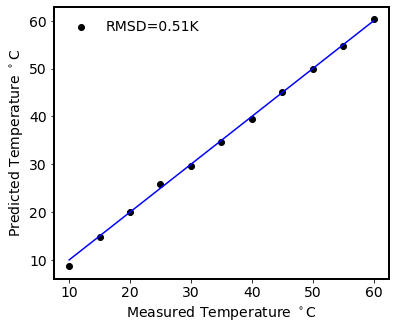

In [124]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(6,5))
plt.scatter(Y_dat_test,reg.predict(X_dat_test),label='RMSD=0.51K',color='black')
plt.plot(Y_dat_test,Y_dat_test,color='blue')
plt.legend(frameon=False)
plt.xlabel('Measured Temperature $^\circ$C')
plt.ylabel('Predicted Temperature $^\circ$C')
plt.savefig("predict_reg_comb_2.png",facecolor='white',dpi=300)